# Sentimental Analysis on Amazon Reviews

Please upload all 3 csv files before running the code. Negative and neutral_sentiments csv files are additions to the existing dataset because it is very overfitted.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
import seaborn as sns

import re
import contractions

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

C:\Users\likhi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("amazon_reviews.csv")

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
df.shape

(4915, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [6]:
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [7]:
df= df.dropna(subset=['reviewerName', 'reviewText'])

df.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [8]:
df.shape

(4913, 12)

In [9]:
df['overall'].unique()

array([5., 4., 3., 1., 2.])

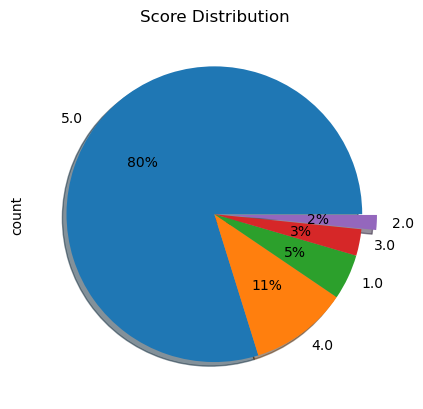

In [10]:
df['overall'].value_counts().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%.0f%%")
plt.title('Score Distribution')
plt.show()

In [11]:
df['overall'].value_counts(normalize=True)

overall
5.0    0.798087
4.0    0.107063
1.0    0.049664
3.0    0.028903
2.0    0.016283
Name: proportion, dtype: float64

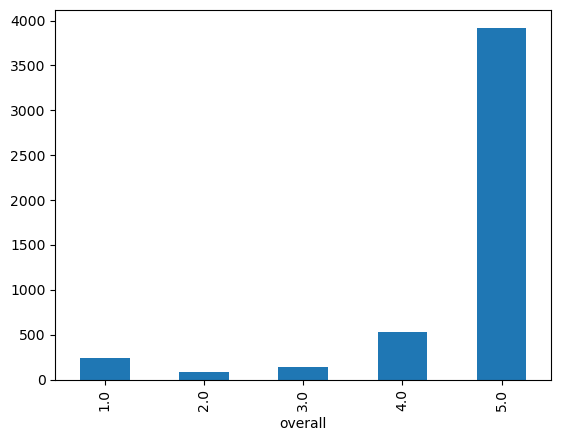

In [12]:
df['overall'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [13]:
def sentiment(row):
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [14]:
df['Sentiment'] = df.apply(sentiment, axis=1)
print(df['Sentiment'].shape)
df.head()

(4913,)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,Sentiment
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,Positive
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,Positive
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,Positive
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,Positive
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0,Positive


In [15]:
df['Sentiment'].value_counts()

Sentiment
Positive    4447
Negative     324
Neutral      142
Name: count, dtype: int64

In [16]:
df[df.duplicated(subset = [ 'reviewerID', 'reviewerName', 'overall', 'unixReviewTime', 'reviewTime', 'day_diff'], keep = False)]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,Sentiment


In [17]:
df['reviews']=df['reviewText']+df['summary']
df=df.drop(['reviewText', 'summary'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,Sentiment,reviews
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",5.0,1382659200,2013-10-25,409,0,0,Positive,"Purchased this for my device, it worked as adv..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",4.0,1356220800,2012-12-23,715,0,0,Positive,it works as expected. I should have sprung for...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",5.0,1384992000,2013-11-21,382,0,0,Positive,This think has worked out great.Had a diff. br...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",5.0,1373673600,2013-07-13,513,0,0,Positive,"Bought it with Retail Packaging, arrived legit..."
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",5.0,1367193600,2013-04-29,588,0,0,Positive,It's mini storage. It doesn't do anything els...


In [18]:
df['year'] = pd.to_datetime(df['reviewTime']).dt.year
df['month'] = pd.to_datetime(df['reviewTime']).dt.month
df['date'] = pd.to_datetime(df['reviewTime']).dt.day

df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,Sentiment,reviews,year,month,date
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",5.0,1382659200,2013-10-25,409,0,0,Positive,"Purchased this for my device, it worked as adv...",2013,10,25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",4.0,1356220800,2012-12-23,715,0,0,Positive,it works as expected. I should have sprung for...,2012,12,23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",5.0,1384992000,2013-11-21,382,0,0,Positive,This think has worked out great.Had a diff. br...,2013,11,21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",5.0,1373673600,2013-07-13,513,0,0,Positive,"Bought it with Retail Packaging, arrived legit...",2013,7,13
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",5.0,1367193600,2013-04-29,588,0,0,Positive,It's mini storage. It doesn't do anything els...,2013,4,29


In [19]:
df.date.unique()

array([25, 23, 21, 13, 29, 19,  7, 24, 10,  5, 20, 17,  1,  3, 27, 11,  4,
       28, 26, 16, 15,  8,  9, 18, 30, 31, 14,  2, 12, 22,  6])

In [20]:
# Daily analysis
date_counts = df['date'].value_counts().reset_index()
date_counts.columns = ['date', 'frequency']
date_counts = date_counts.sort_values('date')

# Monthly analysis
month_counts = df['month'].value_counts().reset_index()
month_counts.columns = ['month', 'frequency']
month_counts = month_counts.sort_values('month')

# Yearly analysis
year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'frequency']
year_counts = year_counts.sort_values('year')

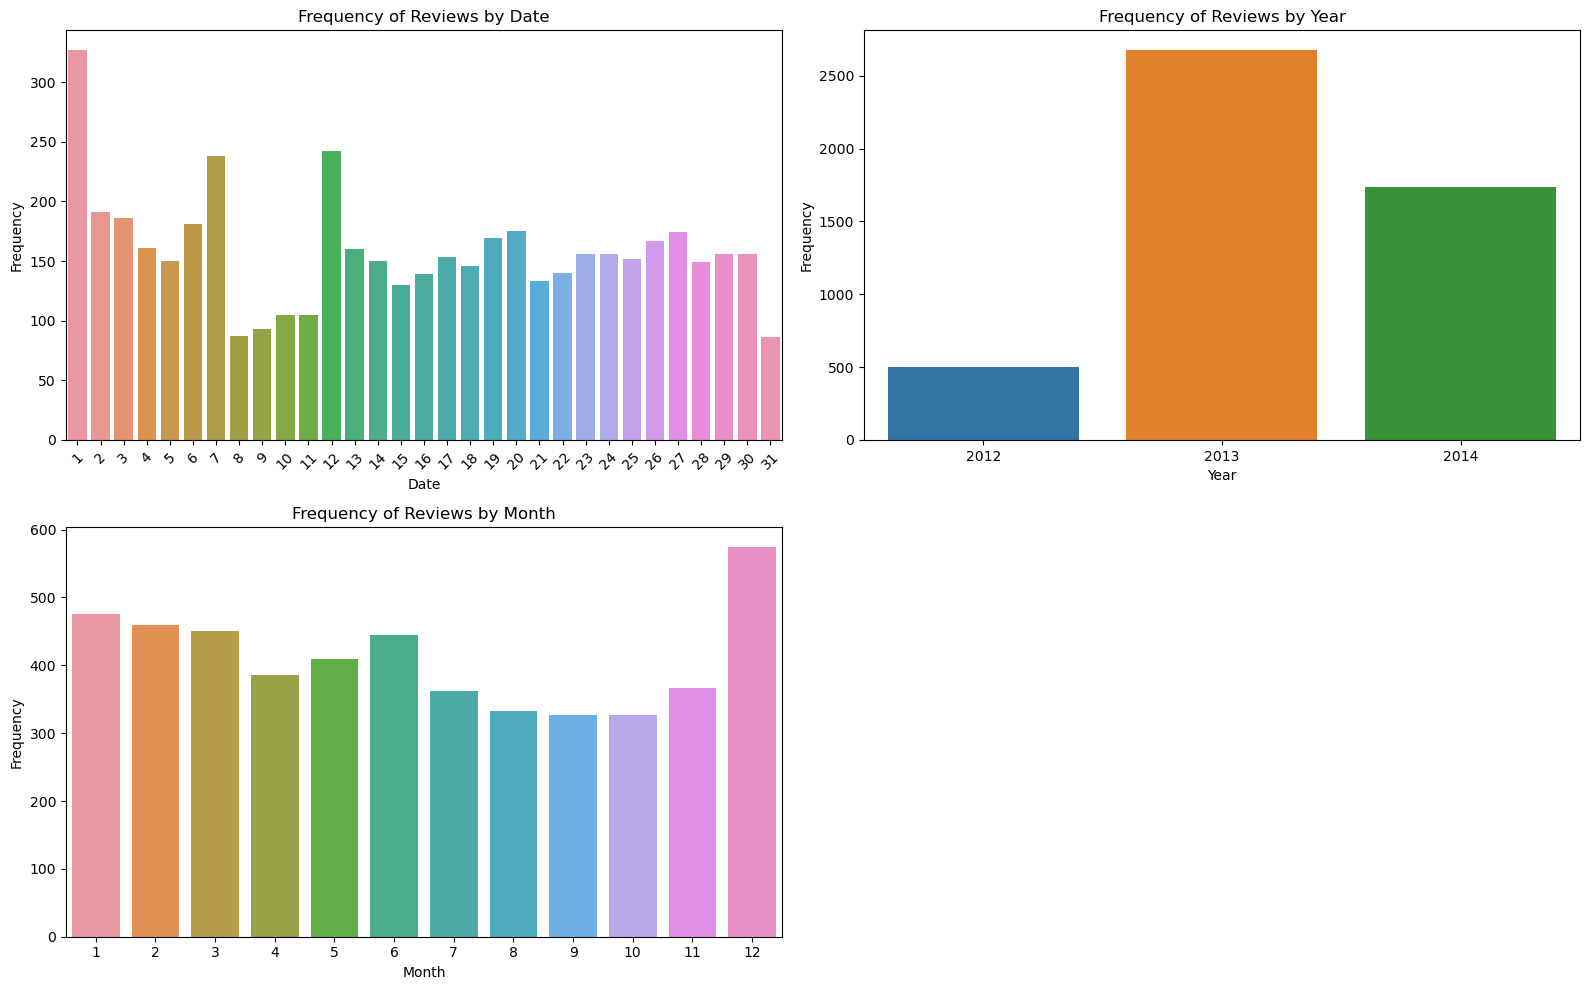

In [21]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

sns.barplot(x='date', y='frequency', data=date_counts, ax=axs[0, 0])
axs[0, 0].set_title('Frequency of Reviews by Date')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='year', y='frequency', data=year_counts, ax=axs[0, 1])
axs[0, 1].set_title('Frequency of Reviews by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Frequency')

sns.barplot(x='month', y='frequency', data=month_counts, ax=axs[1, 0])
axs[1, 0].set_title('Frequency of Reviews by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Frequency')

fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


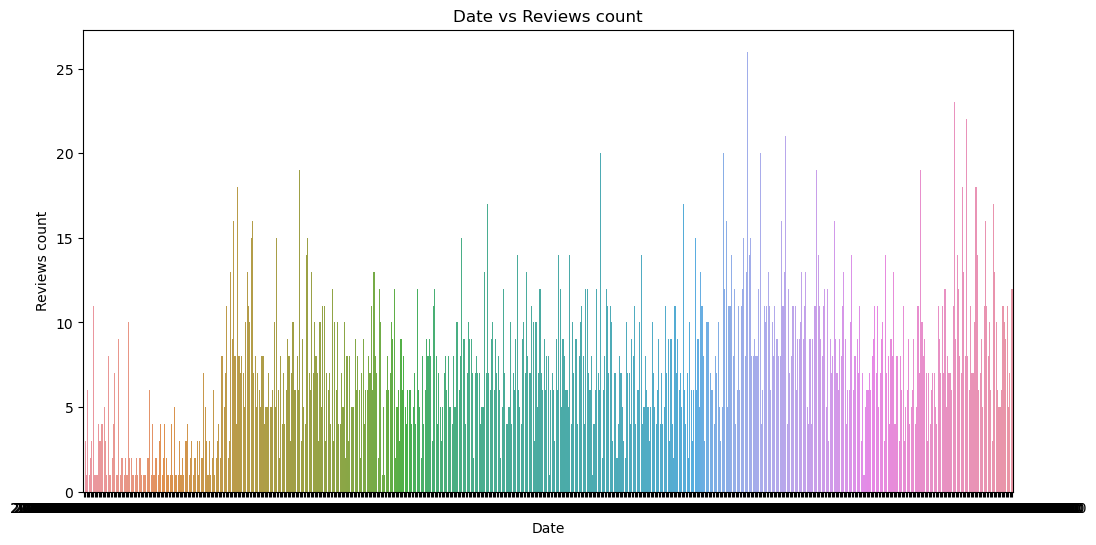

In [22]:
day = pd.DataFrame(df.groupby('reviewTime')['reviews'].count()).reset_index()
day['date'] = pd.to_datetime(day['reviewTime']) 
day.sort_values(by=['reviewTime'], inplace=True) 

plt.figure(figsize=(12, 6))
sns.barplot(x="date", y="reviews", data=day)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.xticks() 
plt.show()

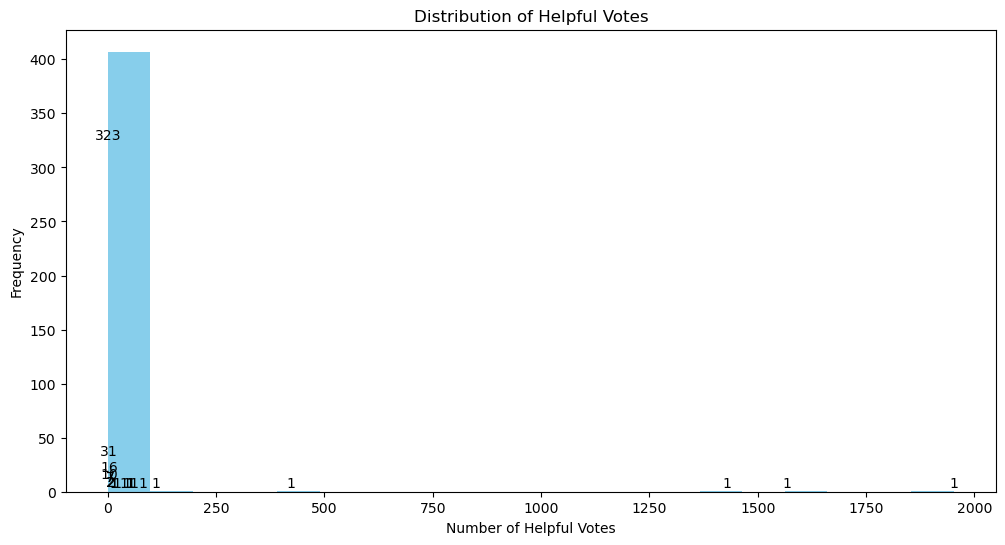

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['helpful_yes'] > 0]['helpful_yes'], bins=20, color='skyblue')

value_counts = df[df['helpful_yes'] > 0]['helpful_yes'].value_counts()

for value, count in value_counts.items():
    plt.text(value, count, str(count), ha='center', va='bottom')

plt.xlabel('Number of Helpful Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Helpful Votes')
plt.show()

C:\Users\likhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


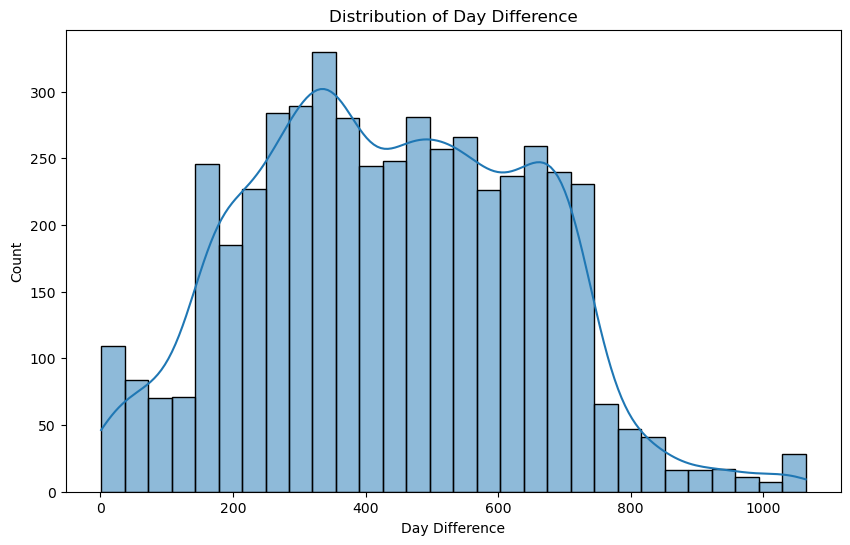

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['day_diff'], bins=30, kde=True)
plt.title('Distribution of Day Difference')
plt.xlabel('Day Difference')
plt.ylabel('Count')
plt.show()

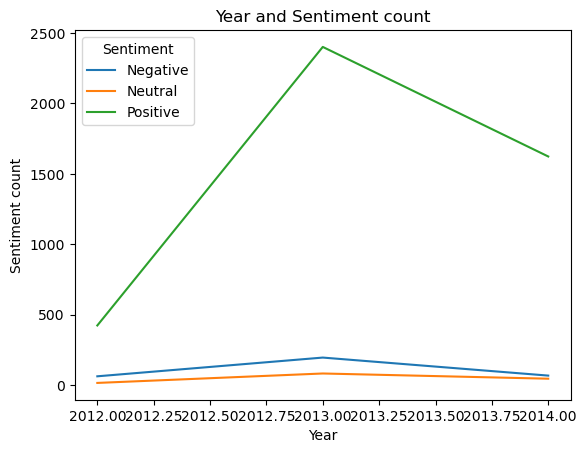

In [25]:
df.groupby(['year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [26]:
new1 = df["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

helpful=pd.concat([new2, new3], axis=1)


In [27]:
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)


In [28]:
helpful= trim_all_columns(helpful)

helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

C:\Users\likhi\AppData\Local\Temp\ipykernel_12812\4259366958.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(trim_strings)


In [29]:
helpful['result'] = helpful['result'].fillna(0)

helpful['result']=helpful['result'].round(2)

df['helpful_rate']=helpful['result']

df=df.drop(['helpful'], axis=1)

In [30]:
df.helpful_rate.unique()

array([0.  , 1.  , 0.5 , 0.71, 0.75, 0.79, 0.85, 0.86, 0.33, 0.8 , 0.83,
       0.6 , 0.88, 0.2 , 0.97, 0.07, 0.22, 0.14, 0.95, 0.67, 0.81, 0.93,
       0.78, 0.31, 0.92,  nan])

In [31]:
pd.DataFrame(df.groupby('Sentiment')['helpful_rate'].mean())

,helpful_rate
Sentiment,
Negative,0.092438
Neutral,0.104577
Positive,0.072990


In [32]:
reviewer_counts = df['reviewerID'].value_counts()

top_reviewers = reviewer_counts.head(5)

top_reviews_df = df[df['reviewerID'].isin(top_reviewers.index)]

top_reviewers_analysis = top_reviews_df.groupby('reviewerID').agg({
    'overall': 'mean', 
    'helpful_yes': 'sum',  
    'total_vote': 'sum'  
})

print("Top Reviewers:")
print(top_reviewers)
print("\nTop Reviewers Analysis:")
print(top_reviewers_analysis)

Top Reviewers:
reviewerID
A18K1ODH1I2MVB    1
A2RP2S43BN0ZB     1
A3BE8EQ3HG71MK    1
A21MMTDAFAUPQT    1
AM1T7QCP4B8EW     1
Name: count, dtype: int64

Top Reviewers Analysis:
                overall  helpful_yes  total_vote
reviewerID                                      
A18K1ODH1I2MVB      5.0            0           0
A21MMTDAFAUPQT      5.0            0           0
A2RP2S43BN0ZB       5.0            0           0
A3BE8EQ3HG71MK      5.0            0           0
AM1T7QCP4B8EW       5.0            0           0


In [33]:
# Find the average overall rating, helpful_yes, and total_vote for each asin
average_ratings = df.groupby('asin').agg({
    'overall': 'mean',
    'helpful_yes': 'mean',
    'total_vote': 'sum'
})

average_ratings

,overall,helpful_yes,total_vote
asin,,,
B007WTAJTO,4.587625,1.311215,7475


In [34]:
df['asin'].unique()

array(['B007WTAJTO'], dtype=object)

In [35]:
df.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,Sentiment,reviews,year,month,date,helpful_rate
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,5.0,1382659200,2013-10-25,409,0,0,Positive,"Purchased this for my device, it worked as adv...",2013,10,25,0.0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,4.0,1356220800,2012-12-23,715,0,0,Positive,it works as expected. I should have sprung for...,2012,12,23,0.0
3,A3H99DFEG68SR,B007WTAJTO,1m2,5.0,1384992000,2013-11-21,382,0,0,Positive,This think has worked out great.Had a diff. br...,2013,11,21,0.0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,5.0,1373673600,2013-07-13,513,0,0,Positive,"Bought it with Retail Packaging, arrived legit...",2013,7,13,0.0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,5.0,1367193600,2013-04-29,588,0,0,Positive,It's mini storage. It doesn't do anything els...,2013,4,29,0.0


In [36]:
df.helpful_yes.unique()

array([   0,    1,    3,   15,    4,    5,    2,   38,  422,    6,    7,
         60, 1952,    8,   53, 1428,   22,  112, 1568,   14,   51,   82,
         45], dtype=int64)

In [37]:
nltk_stopwords= set(stopwords.words('english'))
nltk_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [38]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords=set(ENGLISH_STOP_WORDS)
sklearn_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [39]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [40]:
combined_stopwords= nltk_stopwords.union(sklearn_stopwords)

In [41]:
len(combined_stopwords)

378

In [42]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [43]:
def text_without_stopwords(text):
    text = str(text)  
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub('https?://\S+|www\.\S+', "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ' '.join(lemmatizer.lemmatize(token) for token in new_text.split() if token.lower() not in combined_stopwords)
    return cleaned_text.strip()

In [44]:
import string


cleaned_review=[]

for text in df['reviews']:
    cleaned_review.append(text_without_stopwords(text))

In [45]:
cleaned_review

['purchased device worked advertised phone memory download lot stuff brainer moar space',
 'work expected sprung higher capacity think bit cheesier earlier version paint look clean beforenothing really say',
 'think worked great different bran gb card went south month held pretty note update month zero issue transferred note note card reliable solid cheer great buy price update',
 'bought retail packaging arrived legit orange envelope english version asian like picture show arrived quickly bought retail packaging htc sv lg optimus card working order probably best price nice sd cardbest deal',
 'mini storage supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks lot really said',
 'phone skip beat file transfer speedy corruption issue memory fade issue expect sandisk brand great card entrust precious file slightly cheaper piece crap lose forgive spending extra couple buck trusted product go good qa work',
 'hard be

In [46]:
df['Cleaned_Review']=cleaned_review

In [47]:
df['Cleaned_Review'].shape

(4913,)

In [48]:
df.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,Sentiment,reviews,year,month,date,helpful_rate,Cleaned_Review
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,5.0,1382659200,2013-10-25,409,0,0,Positive,"Purchased this for my device, it worked as adv...",2013,10,25,0.0,purchased device worked advertised phone memor...
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,4.0,1356220800,2012-12-23,715,0,0,Positive,it works as expected. I should have sprung for...,2012,12,23,0.0,work expected sprung higher capacity think bit...
3,A3H99DFEG68SR,B007WTAJTO,1m2,5.0,1384992000,2013-11-21,382,0,0,Positive,This think has worked out great.Had a diff. br...,2013,11,21,0.0,think worked great different bran gb card went...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,5.0,1373673600,2013-07-13,513,0,0,Positive,"Bought it with Retail Packaging, arrived legit...",2013,7,13,0.0,bought retail packaging arrived legit orange e...
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,5.0,1367193600,2013-04-29,588,0,0,Positive,It's mini storage. It doesn't do anything els...,2013,4,29,0.0,mini storage supposed purchased add additional...


In [49]:
df.iloc[0]['Cleaned_Review']

'purchased device worked advertised phone memory download lot stuff brainer moar space'

In [50]:
df.iloc[0]['reviews']

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.MOAR SPACE!!!'

In [51]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'overall', 'unixReviewTime',
       'reviewTime', 'day_diff', 'helpful_yes', 'total_vote', 'Sentiment',
       'reviews', 'year', 'month', 'date', 'helpful_rate', 'Cleaned_Review'],
      dtype='object')

In [52]:
data = df.drop(columns=['reviewerID', 'asin', 'reviewerName', 'overall', 'unixReviewTime', 
                 'reviewTime', 'day_diff','helpful_yes', 'total_vote', 'year', 'month', 'date','helpful_rate','reviews'])

In [53]:
data.head()

,Sentiment,Cleaned_Review
1,Positive,purchased device worked advertised phone memor...
2,Positive,work expected sprung higher capacity think bit...
3,Positive,think worked great different bran gb card went...
4,Positive,bought retail packaging arrived legit orange e...
5,Positive,mini storage supposed purchased add additional...


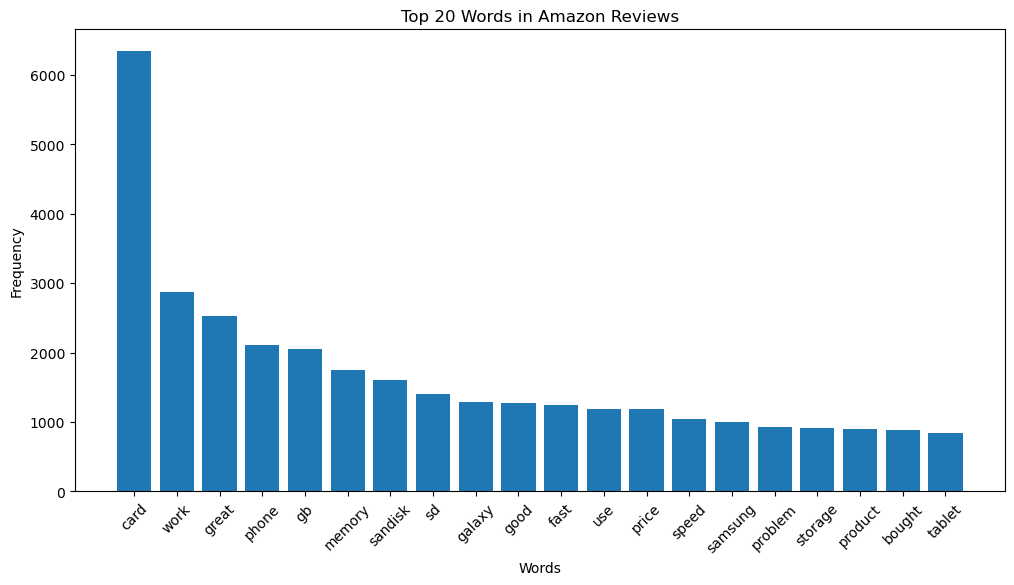

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Cleaned_Review'])

feature_names = vectorizer.get_feature_names_out()

word_counts = X.sum(axis=0)

word_counts_df = pd.DataFrame(word_counts, columns=feature_names)

top_words = word_counts_df.T.sort_values(0, ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_words.index, top_words[0])
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Amazon Reviews')
plt.show()


In [55]:
data2=pd.read_csv("negative_sentiment.csv")
data2.head()

,Text,Sentiment
0,Product arrived labeled as Jumbo Salted Peanut...,Negative
1,If you are looking for the secret ingredient i...,Negative
2,My cats have been happily eating Felidae Plati...,Negative
3,I love eating them and they are good for watch...,Negative
4,"The candy is just red , No flavor . Just plan...",Negative


In [56]:
cleaned_reviews=[]

for text in data2['Text']:
    cleaned_reviews.append(text_without_stopwords(text))

In [57]:
data2['Cleaned_Review']=cleaned_reviews
data2 = data2.drop(columns=['Text'])

data2['Cleaned_Review'].shape

(4000,)

In [58]:
concatenated_df = pd.concat([data, data2], ignore_index=True)

concatenated_df.to_csv('amazon_sentiments.csv', index=False)

In [59]:
dd=pd.read_csv("amazon_sentiments.csv")
dd

,Sentiment,Cleaned_Review
0,Positive,purchased device worked advertised phone memor...
1,Positive,work expected sprung higher capacity think bit...
2,Positive,think worked great different bran gb card went...
3,Positive,bought retail packaging arrived legit orange e...
4,Positive,mini storage supposed purchased add additional...
...,...,...
8908,Negative,bought pack box arrived inspected nutrition la...
8909,Negative,oatmeal clearly say use life dha manufactured ...
8910,Negative,loved product day playing w daughter month sai...
8911,Negative,used cereal daughter baby year ago great order...


In [60]:
data3=pd.read_csv("neutral_sentiment.csv")
data3.head()

,Text,Sentiment
0,This seems a little more wholesome than some o...,Neutral
1,"The flavors are good. However, I do not see a...",Neutral
2,This is the same stuff you can buy at the big ...,Neutral
3,we're used to spicy foods down here in south t...,Neutral
4,Watch your prices with this. While the assort...,Neutral


In [61]:
cleaned_reviews=[]

for text in data3['Text']:
    cleaned_reviews.append(text_without_stopwords(text))

In [62]:
data3['Cleaned_Review']=cleaned_reviews
data3 = data3.drop(columns=['Text'])

data3['Cleaned_Review'].shape

(4000,)

In [63]:
concatenated_df = pd.concat([dd, data3], ignore_index=True)

concatenated_df.to_csv('amazon_sentiment_mixed.csv', index=False)

In [64]:
data=pd.read_csv('amazon_sentiment_mixed.csv')
data.shape

(12913, 2)

In [65]:
data

,Sentiment,Cleaned_Review
0,Positive,purchased device worked advertised phone memor...
1,Positive,work expected sprung higher capacity think bit...
2,Positive,think worked great different bran gb card went...
3,Positive,bought retail packaging arrived legit orange e...
4,Positive,mini storage supposed purchased add additional...
...,...,...
12908,Neutral,like atkins diet needed bag snack buying numbe...
12909,Neutral,got atkins diet snack cheesy salty delicious e...
12910,Neutral,ordered item friend recommended tasty salty br...
12911,Neutral,bite saltiness hit pretty hard kind grows eati...


In [66]:
data['Sentiment'].value_counts(normalize=True)

Sentiment
Positive    0.344382
Negative    0.334856
Neutral     0.320762
Name: proportion, dtype: float64

In [67]:
label_encoder = preprocessing.LabelEncoder()

data['Sentiment_encoded'] = label_encoder.fit_transform(data['Sentiment'])

In [68]:
data = data.drop('Sentiment', axis=1)

print(data)

                                          Cleaned_Review  Sentiment_encoded
0      purchased device worked advertised phone memor...                  2
1      work expected sprung higher capacity think bit...                  2
2      think worked great different bran gb card went...                  2
3      bought retail packaging arrived legit orange e...                  2
4      mini storage supposed purchased add additional...                  2
...                                                  ...                ...
12908  like atkins diet needed bag snack buying numbe...                  1
12909  got atkins diet snack cheesy salty delicious e...                  1
12910  ordered item friend recommended tasty salty br...                  1
12911  bite saltiness hit pretty hard kind grows eati...                  1
12912  love snack good protein low carbohydrate sodiu...                  1

[12913 rows x 2 columns]


In [69]:
data.Sentiment_encoded.unique()

array([2, 1, 0])

In [70]:
data['Sentiment_encoded'].value_counts()

Sentiment_encoded
2    4447
0    4324
1    4142
Name: count, dtype: int64

In [71]:
data.head()

,Cleaned_Review,Sentiment_encoded
0,purchased device worked advertised phone memor...,2
1,work expected sprung higher capacity think bit...,2
2,think worked great different bran gb card went...,2
3,bought retail packaging arrived legit orange e...,2
4,mini storage supposed purchased add additional...,2


In [72]:
data.shape

(12913, 2)

In [73]:
X=data['Cleaned_Review']
X.shape

(12913,)

In [74]:
y=data['Sentiment_encoded']
y

0        2
1        2
2        2
3        2
4        2
        ..
12908    1
12909    1
12910    1
12911    1
12912    1
Name: Sentiment_encoded, Length: 12913, dtype: int32

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [76]:
X_train.shape, X_test.shape

((10330,), (2583,))

In [77]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

tfidf_X_train= tfidf_vectorizer.transform(X_train)
tfidf_X_test= tfidf_vectorizer.transform(X_test)

In [78]:
label_encoder = LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [79]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(tfidf_X_train, y_train)


In [80]:
X_train.shape, y_train.shape

((10671, 10000), (10671,))

Multinomial NB:

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [82]:
smote = SMOTE(random_state=42)

In [83]:
X_train_resampled, y_train_resampled = smote.fit_resample(tfidf_X_train, y_train)

param_grid = {'alpha': [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]}

nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


In [84]:
y_pred_NB = best_model.predict(tfidf_X_test)

In [85]:
print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best Test Accuracy:", grid_search.best_score_)

Best Alpha: 0.6
Best Test Accuracy: 0.7837127888167267


In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
def plot_cm(y_test, y_pred):
    plt.figure(figsize=(6, 6))
    labels = ['Negative', 'Neutral', 'Positive']
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalizing the confusion matrix
    sns.heatmap(cm_normalized, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Normalized Confusion Matrix')
    plt.show()


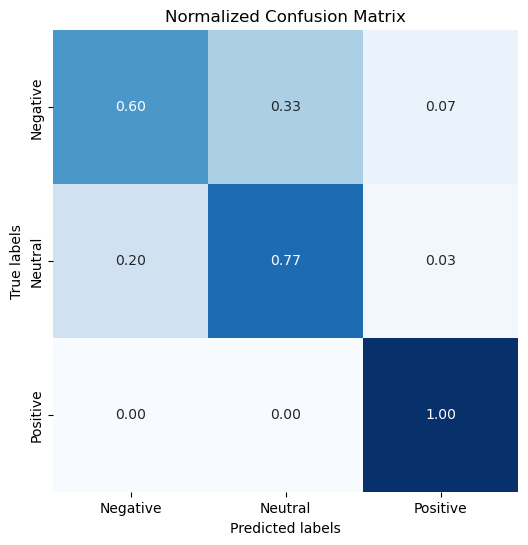

In [88]:
plot_cm(y_test, y_pred_NB)

In [89]:
from sklearn.metrics import classification_report

print("Classification Report:\n",classification_report(y_test, y_pred_NB))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       865
           1       0.69      0.77      0.72       828
           2       0.91      1.00      0.95       890

    accuracy                           0.79      2583
   macro avg       0.78      0.79      0.78      2583
weighted avg       0.79      0.79      0.78      2583



Logistic Regression:

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty':['l1', 'l2']
}

lr_model = LogisticRegression()

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(tfidf_X_train, y_train)

best_model_LR = grid_search.best_estimator_

y_pred_LR = best_model_LR.predict(tfidf_X_test)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Test Accuracy:", grid_search.best_score_)


C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Test Accuracy: 0.7945788964181993


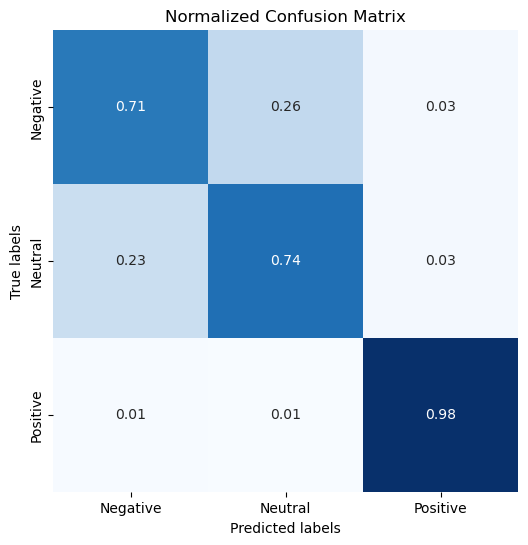

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       865
           1       0.73      0.74      0.73       828
           2       0.95      0.98      0.97       890

    accuracy                           0.81      2583
   macro avg       0.81      0.81      0.81      2583
weighted avg       0.81      0.81      0.81      2583



In [91]:
plot_cm(y_test, y_pred_LR)

print("Classification Report:\n",classification_report(y_test, y_pred_LR))

In [92]:
input_review="the product is horrible"
#input_review="the product is terrible"
#input_review="the product is good"
#input_review="the product is best"


input_review = text_without_stopwords(input_review)
input_review_vector = tfidf_vectorizer.transform([input_review])

sentiment_mapping = {0: "negative", 1: "neutral", 2: "positive"}

predicted_label = best_model.predict(input_review_vector)[0]
#predicted_label = best_model_LR.predict(input_review_vector)[0]
sentiment = sentiment_mapping[predicted_label]

print("Predicted Sentiment:", sentiment)

Predicted Sentiment: negative
